# RICE LEAF DISEASE DETECTION PROJECT

## **BUISNESS CASE: BASED ON THE IMAGE DATA WE NEED TO PREDICT WHICH IMAGE IS DISEASE OF RICE LEAF**

**PROBLEM STATEMENT:-**
- To prepare the complete data analysis on the given data.
- To create a model whcih can classify the three major attacking diseases of rice plants.
- To analyze techniques like Data Augmentation.

**MARKET RESEARCH:-**
- Rice is widely cultivated economical crop in the world. During cultivation the earliest and accurate diagnosis of the rice plant diseases able to reduce the damage, resulting environment protection and better return.
- Rice (Oryza sativa L) being one of the imperative food crops of the word contributes immensely to the food and nutritional security of India. The cultivation of rice is changed over the decades from a simple cultivation practices to theadvanced cultivation to increase yield. Increased in rice yields especially after1960s is mainly due to the introduction of high yielding semi-dwarf varieties which requires more inputs like chemical fertilizers, water and other resources. As a result, India achieved self sufficiency in rice and currently producing more than 115 MT of rice to meet country’s demand.
- With the change in rice cultivation practices, problems also aroused side by side. A number of biotic and abiotic stresses emerged as major constraints for rice cultivation in diverse agro-climatic conditions and growing ecologies. 
- Diseases are the major biotic constraints to rice which can reduce the yields by 20–100% based on severity. Major diseases like brown spot, bacterial blight,leaf smut are still causing more damages.

- Bacterial blight is caused by the bacterium Pseudomonas syringae pv. syringae (Pss), which survives in diseased stem tissue (cankers), plant debris, and soil. Pss can be spread by insects and on pruning tools, but is more commonly spread by wind and rain.
- Brown spot disease in rice is caused by the fungus Cochliobolus miyabeanus (originally Helminthosporium oryzae).The disease begins as small brown spots and progresses to cylindrical, oval, and circular shapes.
- Leaf smut ,caused by fungus Entyloma oryzae is a widely distributed.The fungus produces slightly raised,angular ,black spots(sori)on both sides of leaves.
- At present no significant source of resistance available for any of the above emerging diseases. But looking into the severity of these diseases, it is very important to address them by following integrated management practices like cultural, mechanical, biological and finally chemical control. But more emphasis has to be given to screen gerrmplasm against these diseases and identify stable source of resistance. Finally utilizing these sources in resistance breeding program by employing molecular breeding tools like marker assisted selection (MAS), marker assisted back cross breeding (MABB), gene pyramiding and transgenic tools.
- Early diagnosis and appropriate remedy of the rice leaf infection is crucial in facilitating healthy growth of the rice plants to ensure adequate supply and food security to the rapidly increasing population.

## **IMPORT THE LIBRARIES**

In [47]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Input, Dense
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
%matplotlib inline
import keras


# For split a data
!pip install split-folders
from PIL import Image
import splitfolders
import random
import cv2
import os


# To supress a warning
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **MOUNT GOOGLE DRIVE**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **SPLITTING OF DATA INTO TRAIN, TEST AND VALIDATION USING SPLIT FOLDER LIBRARY**

In [9]:
input_folder = '/content/drive/MyDrive/PRCP-1001-RiceLeaf (1)/Data/Bacteria'

In [10]:
splitfolders.ratio(input_folder, output='output',
                   seed=42, ratio=(.8, .1, .1),group_prefix=None)

Copying files: 120 files [00:00, 327.39 files/s]


## **DATA LOADING**

In [11]:
# Sorting the path of data into veriable
train_dir = r"/content/drive/MyDrive/PRCP-1001-RiceLeaf (1)/Data/output/train2"  #Location of training images
val_dir = r"/content/drive/MyDrive/PRCP-1001-RiceLeaf (1)/Data/output/val2" # Location of test images
test_dir =r"/content/drive/MyDrive/PRCP-1001-RiceLeaf (1)/Data/output/test1" # Location of test images

**TILL HERE THE DATASET IS PROPERLY LOADED, SPLITED AND ASSIGNED INTO VARIABLES, WE CAN CHECK IT IN THE output2 folder inside the drive.**

- Since it has 3 classes it is not binary task but it is a Multiclassification task.
- The dataset has 3 classes labeled as - 

 
1.   *'Bacterial leaf blight': 0,* 


2.   *'Brown spot': 1,*


3.   *'Leaf smut': 2*


- The output2 folder in the drive will have the sub-folders
i.e 


test- the test will have sub-folder bacterial leaf blight,brown spot, leaf smut


train- the train will have sub-folder bacterial leaf blight,brown spot, leaf smut


val- the val will have sub-folder bacterial leaf blight,brown spot, leaf smut

## **PERFORM DATA AGUMENTATION**

- **Generating batches of image data**
- Before training the image and passing it as the input, the input should be pre-processed i.e the images should be rescaled also called as Pixel Normalization, Pixel centering i.e featurewise_center and Pixel standarization. It is done through ImageDataGenerator.

In [12]:
train_datagen=ImageDataGenerator(rescale=(1./255),
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     fill_mode='nearest',
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)

val_datagen=ImageDataGenerator(rescale=(1./255),
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     fill_mode='nearest',
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=(1./255))


In [13]:
train_set=train_datagen.flow_from_directory(train_dir,
                                            target_size=(256,256),
                                            batch_size=128,
                                            class_mode='categorical',
                                            color_mode='rgb')

val_set=val_datagen.flow_from_directory(val_dir,
                                            target_size=(256,256),
                                            batch_size=128,
                                            class_mode='categorical',
                                            color_mode='rgb')
test_set=test_datagen.flow_from_directory(test_dir,
                                            target_size=(256,256),
                                            batch_size=128,
                                            class_mode='categorical',
                                            color_mode='rgb')

Found 120 images belonging to 3 classes.
Found 24 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


- **There are 120 images out of which 40 images are of bacterial leaf blight, 40 images are of leaf smut and 40 images are of brown spot.**
- **flow_from_directory takes the path to a directory & generates batches of augmented data.**
- **Here the color mode, batch size, target size and class mode are defined accordingly**

In [14]:
X_train, y_train=next(train_set)
X_val,y_val=next(val_set)
X_test,y_test=next(test_set)

## **GET ALL CLASSES LABELS**

In [15]:
train_set.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

## **VISUALISE IMAGES**

In [16]:
import os
import cv2

In [17]:
brown_spot = os.listdir(r"/content/drive/MyDrive/PRCP-1001-RiceLeaf (1)/Data/Bacteria/Brown spot")
print("\nBrown Spot:",brown_spot[:10])

leaf_blight = os.listdir(r"/content/drive/MyDrive/PRCP-1001-RiceLeaf (1)/Data/Bacteria/Bacterial leaf blight")
print("\nLeaf Blight:",leaf_blight[:10])

leaf_smut = os.listdir(r"/content/drive/MyDrive/PRCP-1001-RiceLeaf (1)/Data/Bacteria/Leaf smut")
print("\nLeaf Smut: ",leaf_smut[:10])



Brown Spot: ['DSC_0394.jpg', 'DSC_0324.JPG', 'DSC_0391.jpg', 'DSC_0109.jpg', 'DSC_0119.jpg', 'DSC_0116.jpg', 'DSC_0115.jpg', 'DSC_0117.jpg', 'DSC_0118.jpg', 'DSC_0114.jpg']

Leaf Blight: ['DSC_0406.JPG', 'DSC_0405.JPG', 'DSC_0404.JPG', 'DSC_0403.JPG', 'DSC_0402.JPG', 'DSC_0401.JPG', 'DSC_0400.JPG', 'DSC_0399.JPG', 'DSC_0398.JPG', 'DSC_0397.JPG']

Leaf Smut:  ['DSC_0313.JPG', 'DSC_0510.jpg', 'DSC_0503.jpg', 'DSC_0318.JPG', 'DSC_0501.jpg', 'DSC_0312.JPG', 'DSC_0339.jpg', 'DSC_0504.jpg', 'DSC_0500.jpg', 'DSC_0514.jpg']


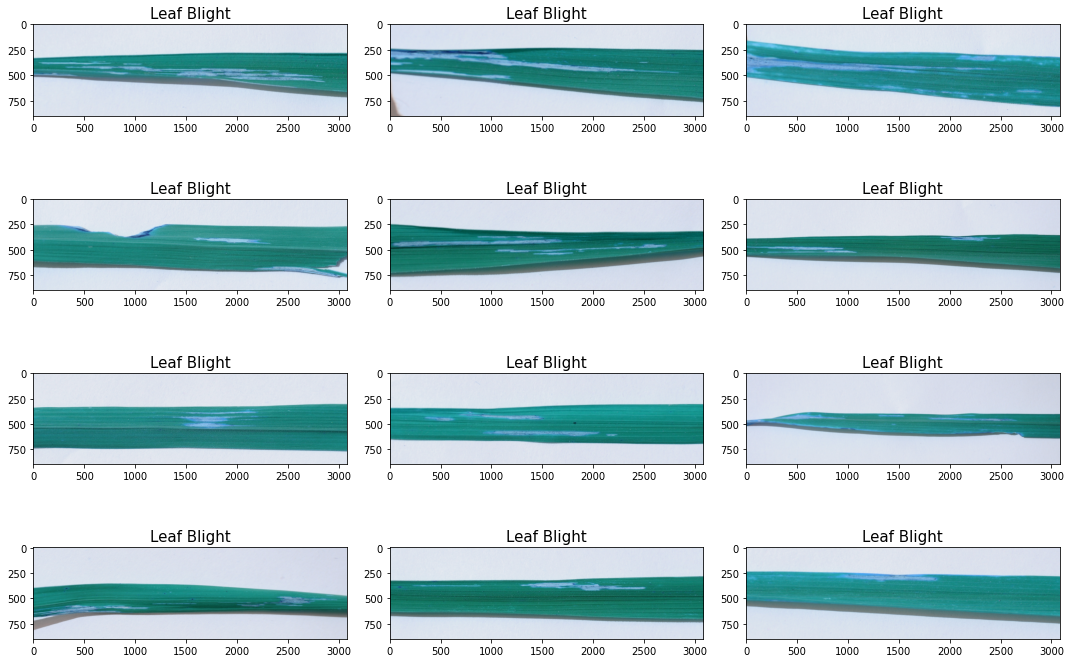

In [18]:
plt.figure(figsize=(15,10),facecolor='white')  #Set canvas size
for i in range(12):
    plt.subplot(4,3,i+1)
    img = cv2.imread(r"/content/drive/MyDrive/PRCP-1001-RiceLeaf (1)/Data/Bacteria/Bacterial leaf blight" + '/' + leaf_blight[i])
    plt.imshow(img)
    plt.title('Leaf Blight',fontsize=15)
plt.tight_layout()


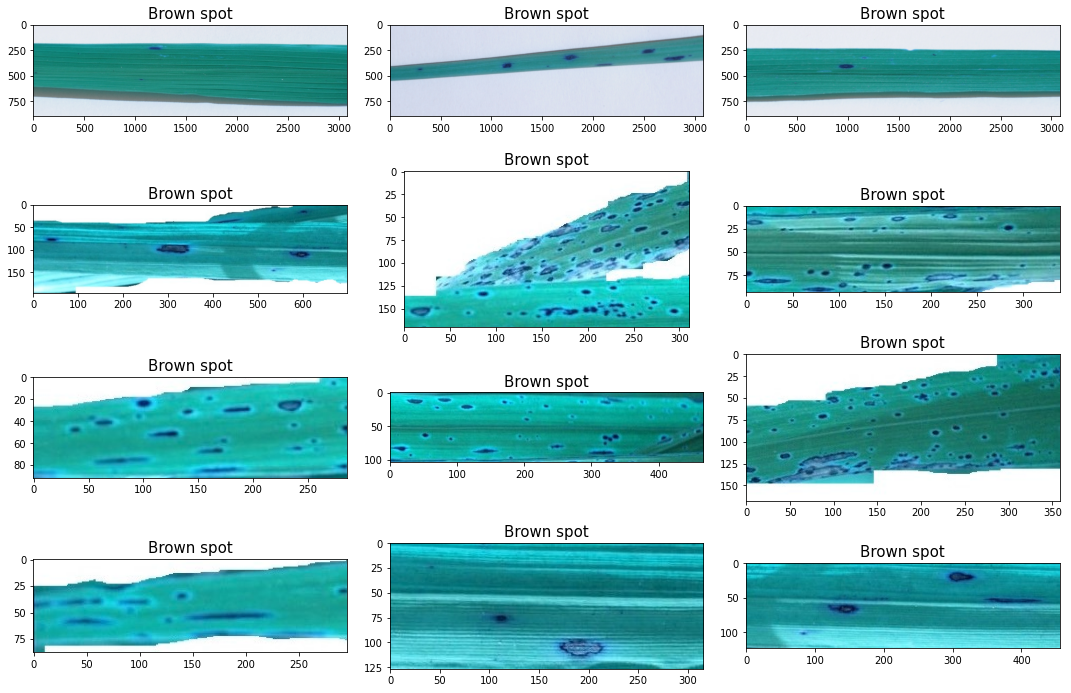

In [19]:
plt.figure(figsize=(15,10),facecolor='white')  #Set canvas size
for i in range(12):
    plt.subplot(4,3,i+1)
    img = cv2.imread(r"/content/drive/MyDrive/PRCP-1001-RiceLeaf (1)/Data/Bacteria/Brown spot" + '/' + brown_spot[i])
    plt.imshow(img)
    plt.title('Brown spot',fontsize=15)
plt.tight_layout()


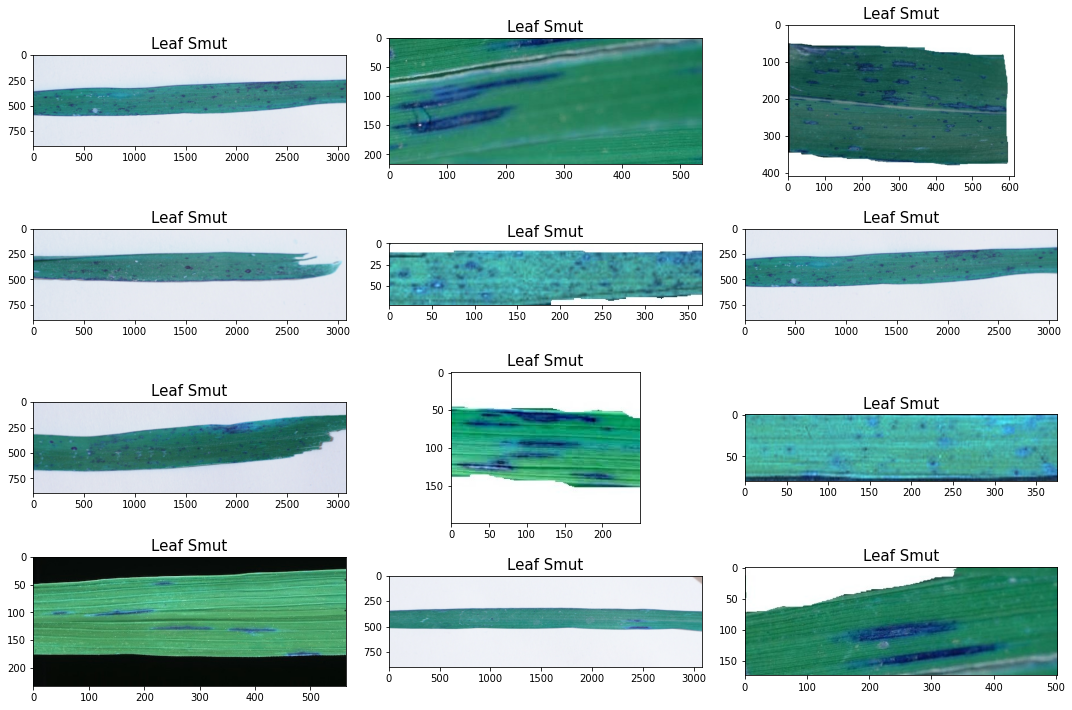

In [20]:
plt.figure(figsize=(15,10), facecolor='White')
for i in range(12):
    plt.subplot(4,3,i+1)
    img = cv2.imread(r"/content/drive/MyDrive/PRCP-1001-RiceLeaf (1)/Data/Bacteria/Leaf smut"+ '/' + leaf_smut[i])
    plt.imshow(img)
    plt.title('Leaf Smut',fontsize=15)
plt.tight_layout()    

## **MODEL BUILDING**

In [21]:
model = Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(256,256,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation ='softmax'))

In [22]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 16.1 MB/s eta 0:00:00


In [23]:
import visualkeras

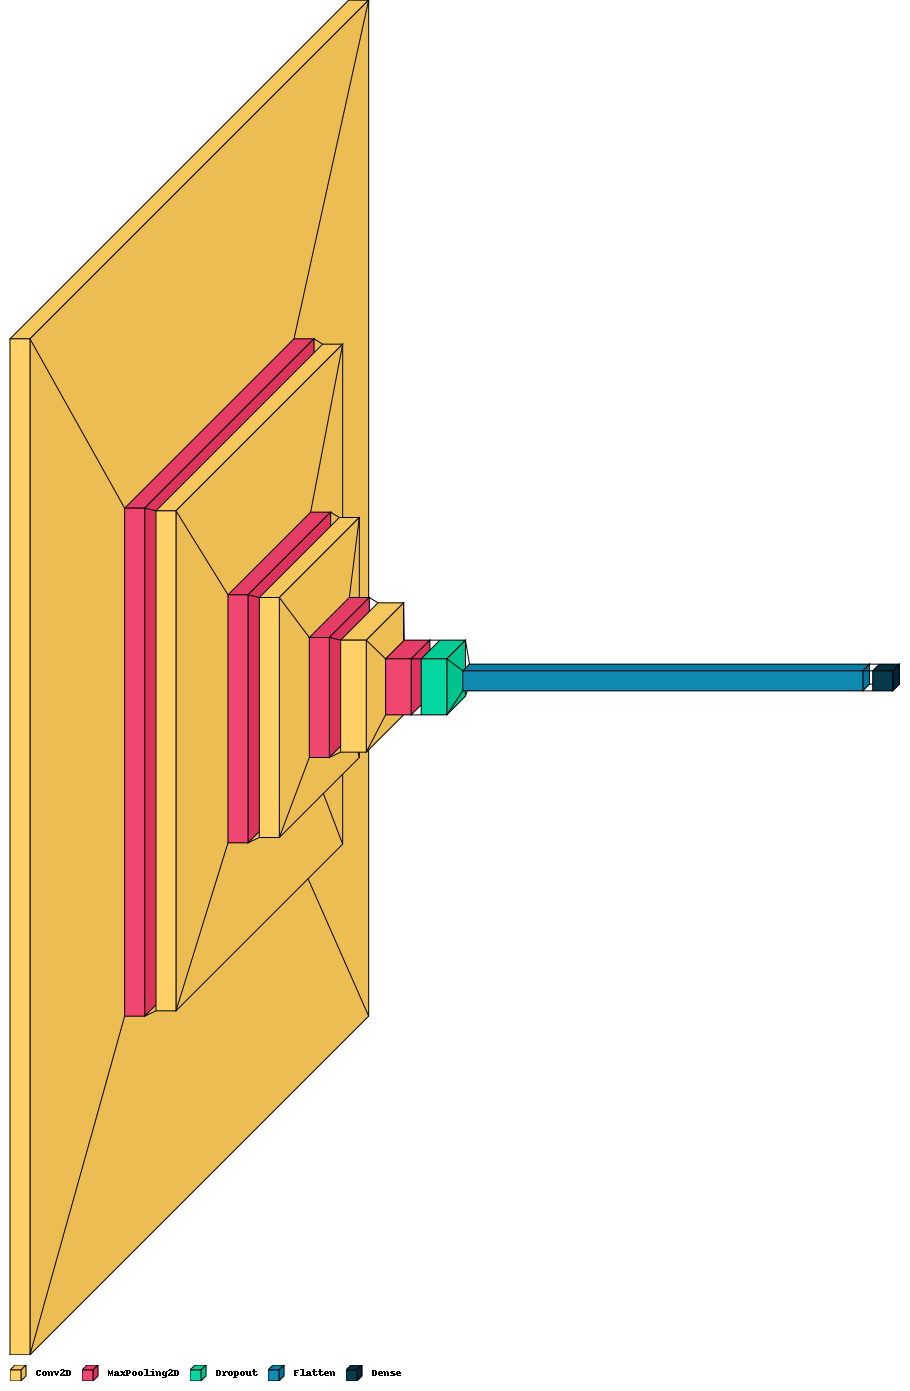

In [24]:
visualkeras.layered_view(model,legend=True)

In [25]:
# Get model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

## **MODEL COMPILE**

In [26]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## **FIT MODEL FOR TRAINING**

In [27]:
# Fitting the data
hist = model.fit_generator(train_set, epochs=80, validation_data=val_set)

Epoch 1/80
1/1 [==============================] - 29s 29s/step - loss: 1.0947 - accuracy: 0.4083 - val_loss: 1.1203 - val_accuracy: 0.3333
Epoch 2/80
1/1 [==============================] - 6s 6s/step - loss: 1.1159 - accuracy: 0.3333 - val_loss: 1.5784 - val_accuracy: 0.3333
Epoch 3/80
1/1 [==============================] - 8s 8s/step - loss: 1.5718 - accuracy: 0.3333 - val_loss: 1.1074 - val_accuracy: 0.3333
Epoch 4/80
1/1 [==============================] - 6s 6s/step - loss: 1.1095 - accuracy: 0.3333 - val_loss: 1.0939 - val_accuracy: 0.3333
Epoch 5/80
1/1 [==============================] - 8s 8s/step - loss: 1.1017 - accuracy: 0.3417 - val_loss: 1.0929 - val_accuracy: 0.2917
Epoch 6/80
1/1 [==============================] - 8s 8s/step - loss: 1.0947 - accuracy: 0.4083 - val_loss: 1.0920 - val_accuracy: 0.3333
Epoch 7/80
1/1 [==============================] - 6s 6s/step - loss: 1.0911 - accuracy: 0.4000 - val_loss: 1.0894 - val_accuracy: 0.3750
Epoch 8/80
1/1 [=======================

In [28]:
model.evaluate(train_set)


1/1 [==============================] - 5s 5s/step - loss: 0.3784 - accuracy: 0.8417


[0.3784244656562805, 0.8416666388511658]

### The Train accuracy is 0.84 and the loss is 0.37

# Plotting the training and validation accuracy and training and validation loss

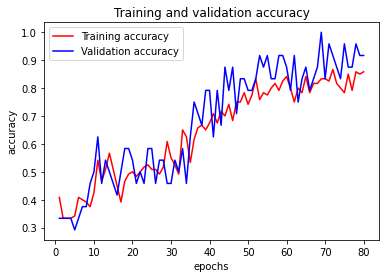

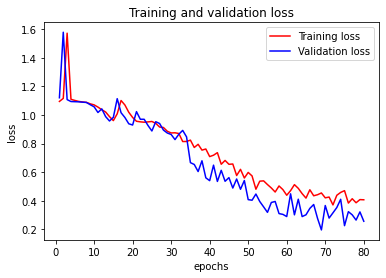

In [36]:
import matplotlib.pyplot as plt
accuracy = hist.history["accuracy"]
val_accuracy = hist.history["val_accuracy"]
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# Visualizing the training data and their labels

In [37]:
def plots(imgs, figsize=(30,25), rows=10, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(imgs) // rows if len(imgs) % 2 ==0 else len(imgs) // rows+1
    for i in range(len(imgs)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
        plt.imshow(imgs[i])


# Make list of classes
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

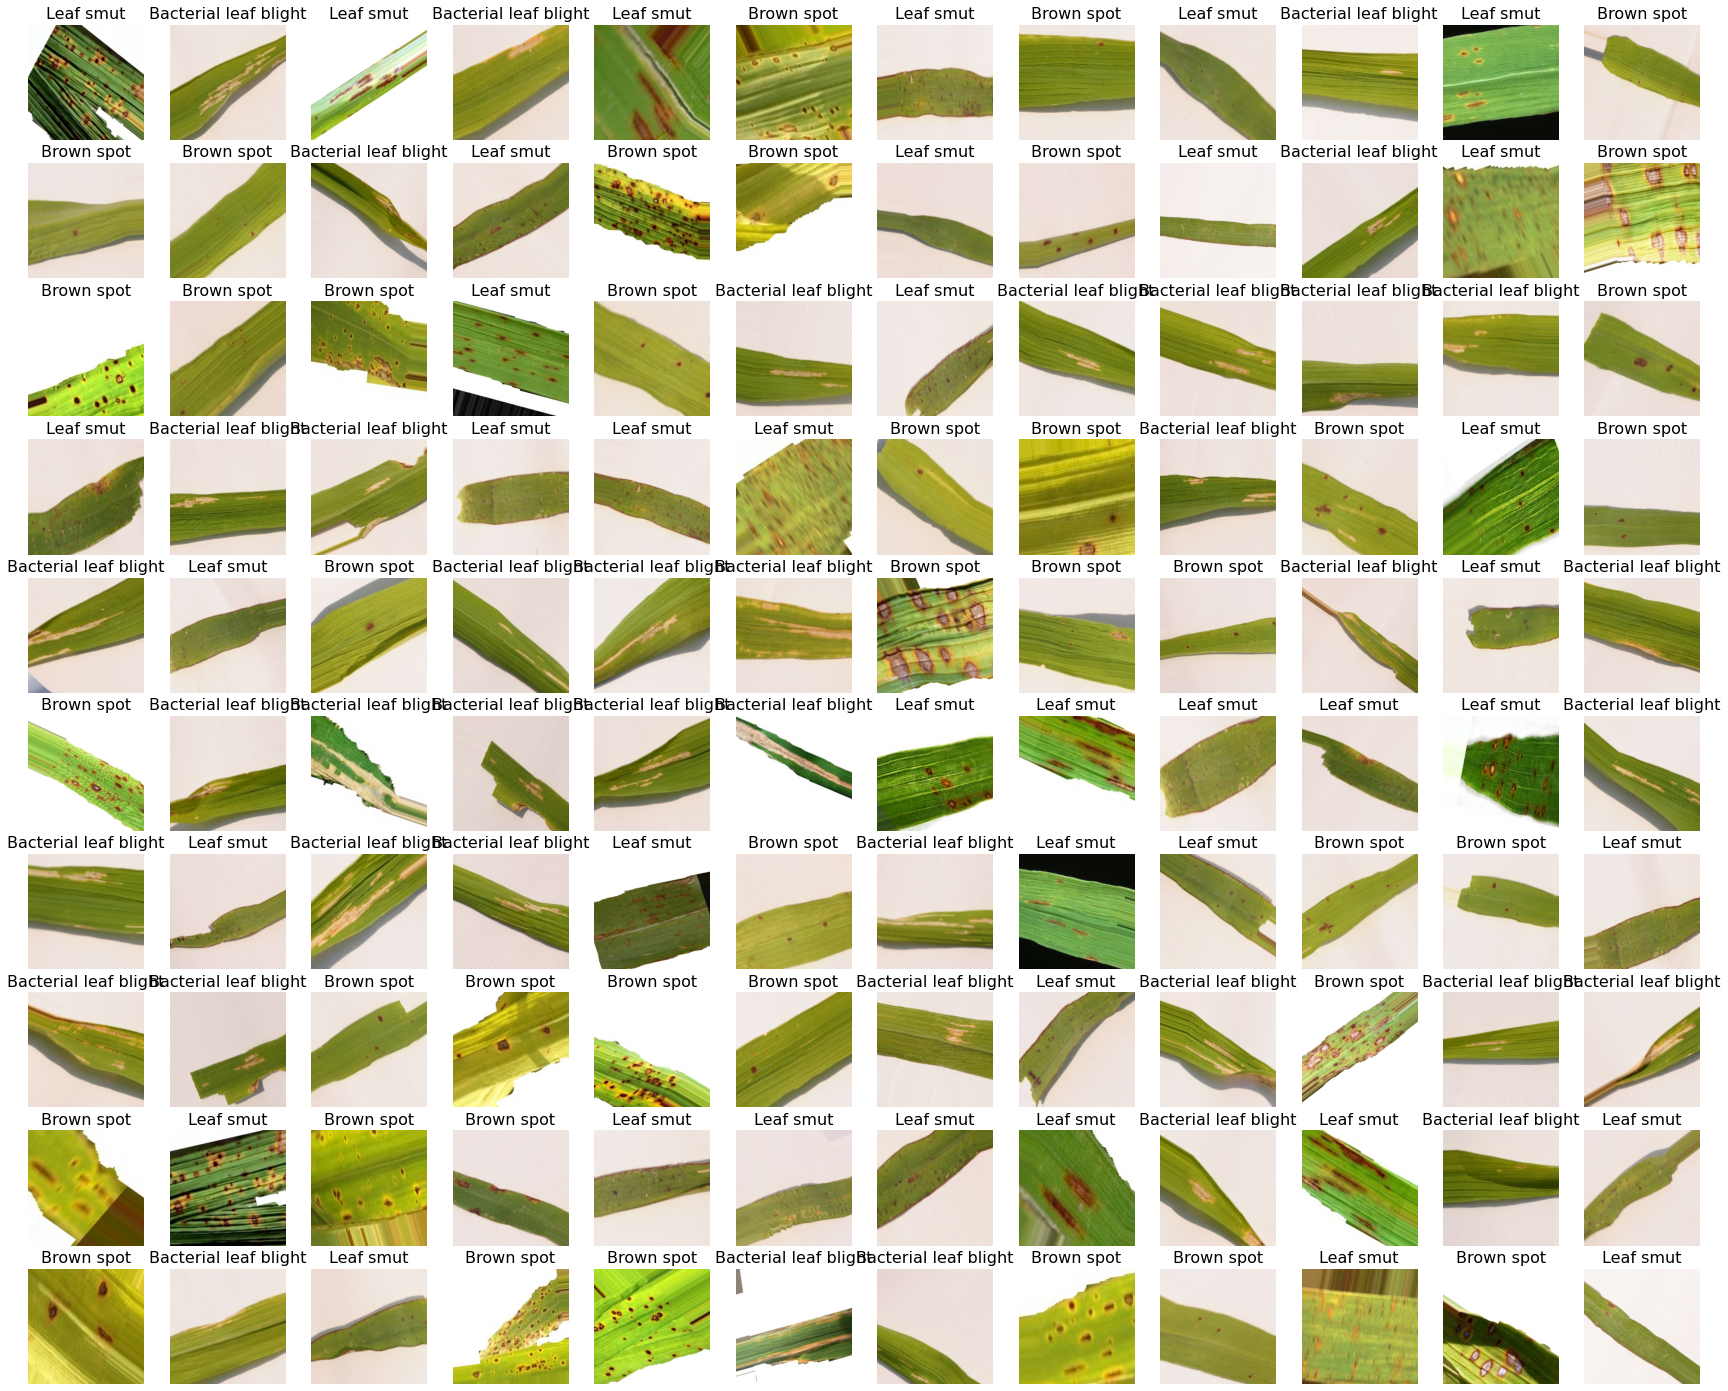

In [38]:
imgs, labels = next(train_set)
plots(imgs, title = labels)

In [39]:
model.evaluate(test_set)

1/1 [==============================] - 1s 748ms/step - loss: 0.2929 - accuracy: 0.9167


[0.29294276237487793, 0.9166666865348816]

## The Testing accuracy is 0.91 and loss is 0.29

# Visualizing the Prediction of the model

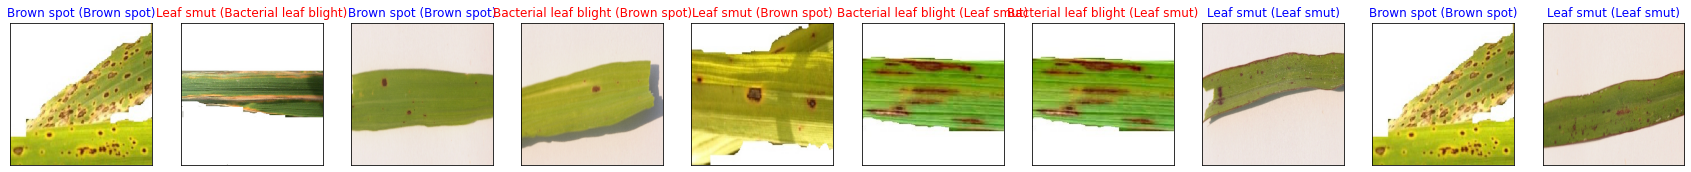

In [44]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(30,35))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=10, replace=True)):
    ax = fig.add_subplot(5,10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[idx])
    pred_idx = np.argmax(y_train[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(class_names[pred_idx], class_names[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

# Saving the model

In [45]:
model.save("CNN.hdf5")

# Challenges Faced

- Handling the missing image
- performing image pre-processing
- Model building

# Conclusion

- Deep learning requires a large number of training images to achieve good results but this dataset was a toy dataset thus the count of images were minimum. 
- In this project, the libraries such as tensor-flow, keras, splitfolders were used for performing image pre-processing, and splitting folders into train, test and validation.
- For building the model, three hidden layers were used with activation function relu.
- We visualized the model through visual-keras followed by training the model with epoch-80 and finally the training accuracy was 84% and the testing accuracy was 91%, respectfully.
- Deep learning technology can be implemented in crop disease diagnosis methods to overcome the drawbacks. In recent years, deep learning has been widely used in image classification, object detection, and content recommendation. In fact, there have been researchers who used deep learning to detect diseases of various crops.